# TP Apprentissage non supervisé

### Cindy Ponidjem & Lucie Helcmanocki

In [3]:
import numpy as np
from sklearn import model_selection as ms
from sklearn import metrics
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from random import randint
import time

In [4]:
from sklearn.utils import check_X_y, check_random_state, safe_indexing, deprecated
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances
np.seterr(divide='ignore', invalid='ignore')
def check_number_of_labels(n_labels, n_samples):
    if not 1 < n_labels < n_samples:
        raise ValueError("Number of labels is %d. Valid values are 2 "
"to n_samples - 1 (inclusive)" % n_labels)

def davies_bouldin_score(X, labels):
    X, labels = check_X_y(X, labels)
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    n_samples, _ = X.shape
    n_labels = len(le.classes_)
    check_number_of_labels(n_labels, n_samples)

    intra_dists = np.zeros(n_labels)
    centroids = np.zeros((n_labels, len(X[0])), dtype=np.float)
    for k in range(n_labels):
        cluster_k = safe_indexing(X, labels == k)
        centroid = cluster_k.mean(axis=0)
        centroids[k] = centroid
        intra_dists[k] = np.average(pairwise_distances(
            cluster_k, [centroid]))

    centroid_distances = pairwise_distances(centroids)

    if np.allclose(intra_dists, 0) or np.allclose(centroid_distances, 0):
        return 0.0

    score = (intra_dists[:, None] + intra_dists) / centroid_distances
    score[score == np.inf] = np.nan
    return np.mean(np.nanmax(score, axis=1))

In [4]:
data = ['t4.8k.dat','t5.8k.dat','t7.10k.dat','t4.8k.dat']
min_samplesList = [17,15,13,8]
XList = []
for i in range(0, len(data)):
    XList.append(np.genfromtxt('./'+data[i],dtype=None,delimiter=' '))

Chercher un eps pour obtenir un bon index de Davies-Bouldin (proche de 0) 

In [66]:
bestEpsList = []
bestDaviesList = []
for i in range(0,len(data)):
    X = XList[i]
    db = DBSCAN(eps=5,min_samples=min_samplesList[i]).fit(X)
    labels = db.labels_
    bestEps=5
    bestDavies = davies_bouldin_score(X, labels)
    for j in np.arange(5.1,20,0.1):
        db = DBSCAN(eps=j,min_samples=min_samplesList[i]).fit(X)
        labels = db.labels_
        davies = davies_bouldin_score(X, labels)
        if davies < bestDavies :
            bestDavies = davies
            bestEps = j
    bestEpsList.append(bestEps)
    bestDaviesList.append(bestDavies)
print(bestEpsList)
print(bestDaviesList)
    

[5.399999999999999, 9.499999999999984, 5.899999999999997, 8.799999999999986]
[1.1885023824332348, 1.5766250899947587, 1.3506019674924497, 1.6293105438322835]


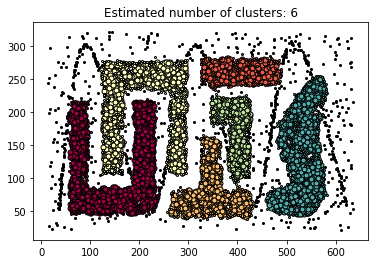

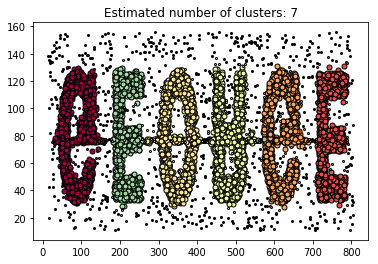

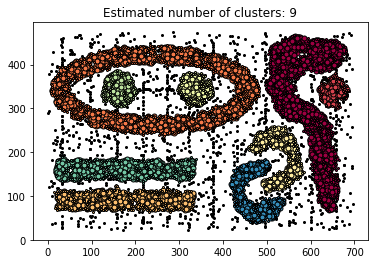

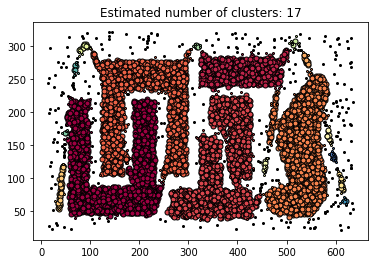

In [67]:
for i in range(0, len(data)):
    X = XList[i]
    db = DBSCAN(eps=bestEps,min_samples=min_samplesList[i]).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # Plot result
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=2)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show() 
    

Chercher un eps pour obtenir une bonne silhouette (proche de 1) 

In [6]:
bestEpsList2 = []
bestSilhouetteList = []
for i in range(0,len(data)):
    X = XList[i]
    db = DBSCAN(eps=5,min_samples=min_samplesList[i]).fit(X)
    labels = db.labels_
    bestEps=5
    bestSilhouette = metrics.silhouette_score(X, labels)
    for j in np.arange(5.1,20,0.1):
        db = DBSCAN(eps=j,min_samples=min_samplesList[i]).fit(X)
        labels = db.labels_
        silhouette = metrics.silhouette_score(X, labels)
        if silhouette < bestSilhouette :
            bestSilhouette = silhouette
            bestEps = j
    bestEpsList2.append(bestEps)
    bestSilhouetteList.append(bestSilhouette)
print(bestEpsList2)
print(bestSilhouetteList)

[5.199999999999999, 15.799999999999962, 5, 5.499999999999998]
[-0.7156728530333448, -0.5570472817032971, -0.7566020444229905, -0.3305404380864504]


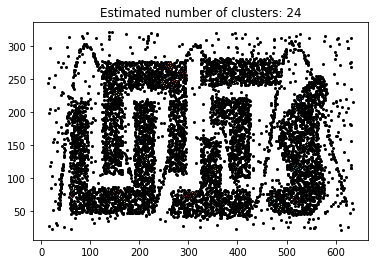

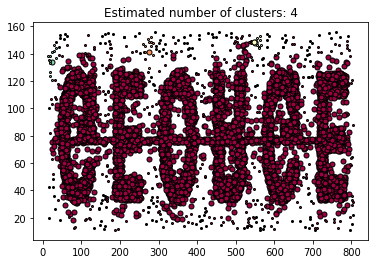

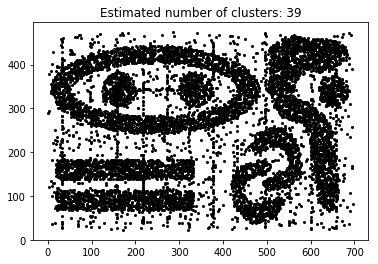

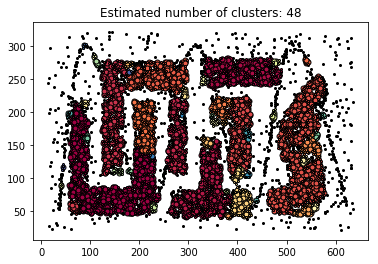

In [9]:
for i in range(0, len(data)):
    X = XList[i]
    db = DBSCAN(eps=bestEpsList2[i],min_samples=min_samplesList[i]).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # Plot result
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=2)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show() 